(473, 750, 3)


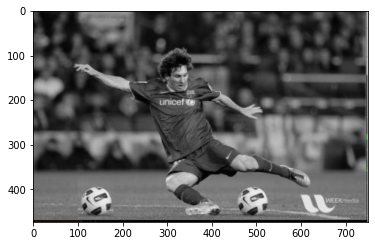

In [6]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'D:\Machine Learning - Umang\OpenCv\images\messy.PNG')
print (img.shape)
ball = img[370:470, 450:530]     ## (y,x)  (Cutting image from a portiion)
img[370:470, 100:180] = ball     ## (Saving image to a portion)
plt.imshow(img, cmap='Paired')   ## prints default color map
plt.show()
cv2.imshow('Messy',img)
cv2.waitKey(0)      #bound to make above cmd work properly..
                    #0 means any button..if we press any button it will close the window 
cv2.destroyAllWindows()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


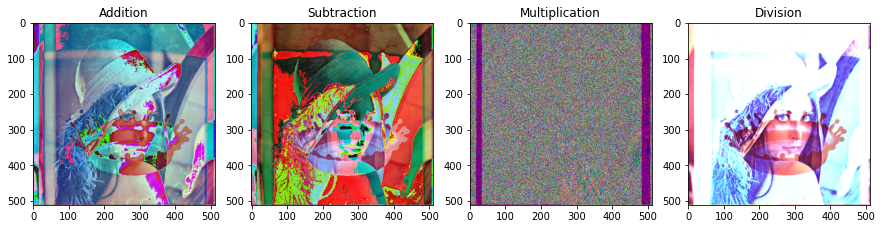

In [2]:
import cv2
import matplotlib.pyplot as plt

# both image should be of same shape
img1Path=r'D:\Machine Learning - Umang\OpenCv\images\lena_color_512.tif'
img2Path=r'D:\Machine Learning - Umang\OpenCv\images\4.2.01.tiff'
img1=cv2.imread(img1Path,1)
img2=cv2.imread(img2Path,1)

img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB);
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB);

add = img1 + img2
sub = img1 - img2
mul = img1 * img2
div = img1 / img2

titles = ['Addition','Subtraction','Multiplication','Division']  ## list
images = [add,sub,mul,div]
plt.figure(figsize=(15,4))
for i in range(4):   
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])   
    plt.title(titles[i])
plt.show()

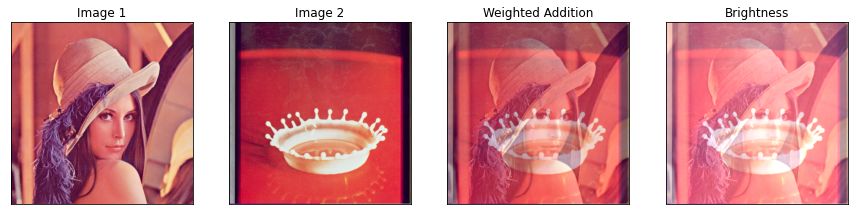

In [5]:
img1 = cv2.imread(img1Path)
img2 = cv2.imread(img2Path)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

## output = a.img1 + b.img2 + y    
## (a,b = weight of img1 and img2, y=brightness)

# a = 0.5, b = 0.6, y=0
output1 = cv2.addWeighted(img1,0.5,img2,0.6,0)

# a = 0.5, b=0.6, y=50
output2 = cv2.addWeighted(img1,0.5,img2,0.6,50)

titles = ['Image 1', 'Image 2', 'Weighted Addition','Brightness']
images = [img1, img2, output1, output2]
plt.figure(figsize=(15,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show() 

In [9]:
import numpy as np
import time
img1 = cv2.imread(img1Path, 1)
img2 = cv2.imread(img2Path, 1)
    
for i in np.linspace(0, 1, 100):
    a = i
    b = 1 - a
    output = cv2.addWeighted(img1, a, img2, b, 0)
    cv2.imshow('Transition', output)
    time.sleep(0.02)    ## in secs
    if cv2.waitKey(1) == 27:   #esc key
        break
        
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

square = np.zeros((300,300,3),np.uint8)
cv2.rectangle(square,(50,50),(250,250),(255,255,255),-1)  
##(on which image,start point,end point,colour(BGR),thickness (-1 for fill))
cv2.imshow('Square',square)
cv2.waitKey(0)

#making as eclipse

ellipse = np.zeros((300,300,3), np.uint8)
cv2.ellipse(ellipse, (150,150), (150,150), 30, 0, 180, (255,0,0), -1)
##(on which image,center,(major axix, minor axis),x-rotation,y-rotation,angle upto,colour(BGR),thickness)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

And = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", And)
cv2.waitKey(0)

Or = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", Or)
cv2.waitKey(0)

Xor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", Xor)
cv2.waitKey(0)

Not = cv2.bitwise_not(ellipse)
cv2.imshow("NOT", Not)
cv2.waitKey(0)


cv2.destroyAllWindows()

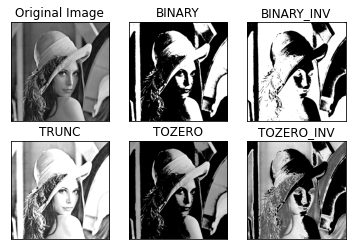

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# must be grayscale image
img = cv2.imread(r'D:\Machine Learning - Umang\OpenCv\images\lena_color_512.tif',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)   ## 127 = Global Value
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

127.0


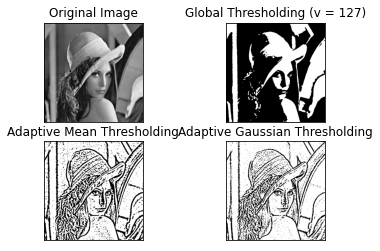

In [4]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'D:\Machine Learning - Umang\OpenCv\images\lena_color_512.tif',0)
img = cv2.medianBlur(img,5)    ## removes salt-and-pepper noise  (applied 50%)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)   ## ret return threshold value
print (ret)
# (src,maxValue,adaptiveMethod,thresholdType,blocksize,c)
# Block Size - It decides the size of neighbourhood area.
# C - It is just a constant which is subtracted from the mean or weighted 
# mean calculated.
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()